### **<font color="crimson"> Ya ok solo diseño </font>**

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cfgrib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [9]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### **<font color="Purple"> Datos de ERA5 </font>**

##### **<font color="olive"> Viento </font>**

##### Climatología diaria

In [10]:
file_anomu = 'datasetsok/anomalias_day_uE5.nc'
file_anomv = 'datasetsok/anomalias_day_vE5.nc'

In [11]:
anomaliasday_u = xr.open_dataset(file_anomu)
anomaliasday_u = anomaliasday_u['u']
anomaliasday_u['time'] = anomaliasday_u.time.dt.floor("D")

In [12]:
anomaliasday_v = xr.open_dataset(file_anomv)
anomaliasday_v = anomaliasday_v['v']
anomaliasday_v['time'] = anomaliasday_v.time.dt.floor("D")

##### **<font color="olive"> Geopotencial </font>**

##### **<font color="olive"> Concat de índice >1 y valores de gph </font>**

In [13]:
# esta es la base que tiene solo las fechas cuando el índice > 1
# es también las anomalías del ciclo anual

In [14]:
# idxp_gph_file = 'datasetsok/gph_et_indiceP+.nc'
idxp_gph_file = 'datasetsok/gph_idx_std+.nc'

In [15]:
idxp_gph_ds = xr.open_dataset(idxp_gph_file)

In [16]:
idxp_gph = idxp_gph_ds['z']
idxp_gph = idxp_gph.sel(pressure_level=500)

In [17]:
idxp_gph_vals = idxp_gph.mean(dim='time') #ya se puede mapear

In [18]:
idxp_gph_season =idxp_gph.groupby(idxp_gph.time.dt.season).mean(dim='time') #DJF
idxp_gph_djf = idxp_gph_season[0] #ya puedo mapear

##### **<font color="olive"> Concat de índice <-1 y valores de gph </font>**

In [19]:
# idxn_gph_file = 'datasetsok/gph_et_indiceN-.nc'
idxn_gph_file = 'datasetsok/gph_idx_std-.nc'

In [20]:
idxn_gph_ds = xr.open_dataset(idxn_gph_file)

In [21]:
idxn_gph = idxn_gph_ds['z']
idxn_gph = idxn_gph.sel(pressure_level=500)

In [22]:
idxn_gph['time'] = idxn_gph.time.dt.floor("D")

In [23]:
idxn_gph_vals = idxn_gph.mean(dim='time') #ya se puede mapear

In [24]:
idxn_gph_season =idxn_gph.groupby(idxn_gph.time.dt.season).mean(dim='time') #DJF
idxn_gph_djf = idxn_gph_season[0] #ya puedo mapear

#### **<font color="olive"> Viento e índice >1 (con valores de gph) </font>**

##### **<font color="pink"> Viento u </font>**

In [25]:
missing_times = np.setdiff1d(idxp_gph.time.values, anomaliasday_u.time.values)
print(missing_times)
len(missing_times)

[]


0

In [27]:
u_ds_idxp = anomaliasday_u.reindex(time=idxp_gph.time) #del campo de anomalías diarias de viento solo agarró las fechas cuando índice es positivo

In [29]:
# u_ds_idxp.to_netcdf('datasetsok/uE5_idx_std2+.nc')

In [26]:
u_idxp = u_ds_idxp
u_idxp['u'] = u_idxp

In [27]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice positivo
u_idxp_vals = u_idxp.mean(dim='time') #ANUAL
u_idxp_season = u_idxp.groupby(u_ds_idxp['u'].time.dt.season).mean(dim='time') #DJF
u_idxp_DJF = u_idxp_season[0] #ya se puede mapear

##### **<font color="pink"> Viento v </font>**

In [30]:
missing_times = np.setdiff1d(idxp_gph.time.values, anomaliasday_v.time.values)
print(missing_times)
len(missing_times)

[]


0

In [31]:
v_ds_idxp = anomaliasday_v.reindex(time=idxp_gph.time) #del campo de anomalías diarias de viento solo agarró las fechas cuando índice es positivo
#no me consta que esté bien, checar indices

In [33]:
# v_ds_idxp.to_netcdf('datasetsok/vE5_idx_std2+.nc')

In [32]:
v_idxp = v_ds_idxp
v_idxp['v'] = v_idxp

In [33]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice positivo
v_idxp_vals = v_idxp.mean(dim='time') #ANUAL
v_idxp_season = v_idxp.groupby(v_ds_idxp['v'].time.dt.season).mean(dim='time') #DJF
v_idxp_DJF = v_idxp_season[0] #ya se puede mapear

#### **<font color="olive"> Viento e índice <-1 (con valores de gph) </font>**

##### **<font color="pink"> Viento u </font>**

In [34]:
missing_times = np.setdiff1d(idxn_gph.time.values, anomaliasday_u.time.values)
len(missing_times)

0

In [36]:
u_ds_idxn = anomaliasday_u.reindex(time=idxn_gph.time)

In [37]:
# u_ds_idxn.to_netcdf('datasetsok/uE5_idx_std2-.nc')

In [37]:
u_idxn = u_ds_idxn
u_idxn['u'] = u_idxn

In [38]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice positivo
u_idxn_vals = u_idxn.mean(dim='time') #ANUAL
u_idxn_season = u_idxn.groupby(u_ds_idxn['u'].time.dt.season).mean(dim='time') #DJF
u_idxn_DJF = u_idxn_season[0] #ya se puede mapear

##### **<font color="pink"> Viento v </font>**

In [38]:
missing_times = np.setdiff1d(idxn_gph.time.values, anomaliasday_v.time.values)
len(missing_times)

0

In [39]:
v_ds_idxn = anomaliasday_v.reindex(time=idxn_gph.time)

In [41]:
# v_ds_idxn.to_netcdf('datasetsok/vE5_idx_std2-.nc')

In [43]:
v_idxn = v_ds_idxn
v_idxn['v'] = v_idxn

In [44]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice negativo
v_idxn_vals = v_idxn.mean(dim='time') #ANUAL
v_idxn_season = v_idxn.groupby(v_ds_idxn.time.dt.season).mean(dim='time') #DJF
v_idxn_DJF = v_idxn_season[0] #ya se puede mapear

##### **<font color="pink"> Mapitas </font>**

In [45]:
g=9.81
idxp_gph_vals = idxp_gph_vals/g
idxn_gph_vals = idxn_gph_vals/g
idxp_gph_djf = idxp_gph_djf/g
idxn_gph_djf = idxn_gph_djf/g

In [49]:
# plt.figure(figsize=(14, 4), dpi=150)
# plt.subplots_adjust(wspace=0.35)

# ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax1.coastlines()
# cs = ax1.contourf(v_idxn_vals.longitude, v_idxn_vals.latitude, v_idxn_vals , levels=np.arange(-10, 10,1), cmap=cm.lajolla_r, extend='both', transform=ccrs.PlateCarree())
# cc = ax1.contour(idxp_gph_vals.longitude, idxp_gph_vals.latitude, idxp_gph_vals,levels=np.arange(0,40,5),colors='k',transform=ccrs.PlateCarree())
# ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
# ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
# gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
# cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=14)
# plt.title('Viento zonal diario (200 hPa) cuando idx > 1 \n ERA5 (1979-2019)', fontsize=10)

Text(0.5, 1.0, 'Viento zonal diario (200 hPa) cuando idx > 1 \n ERA5 (1979-2019)')

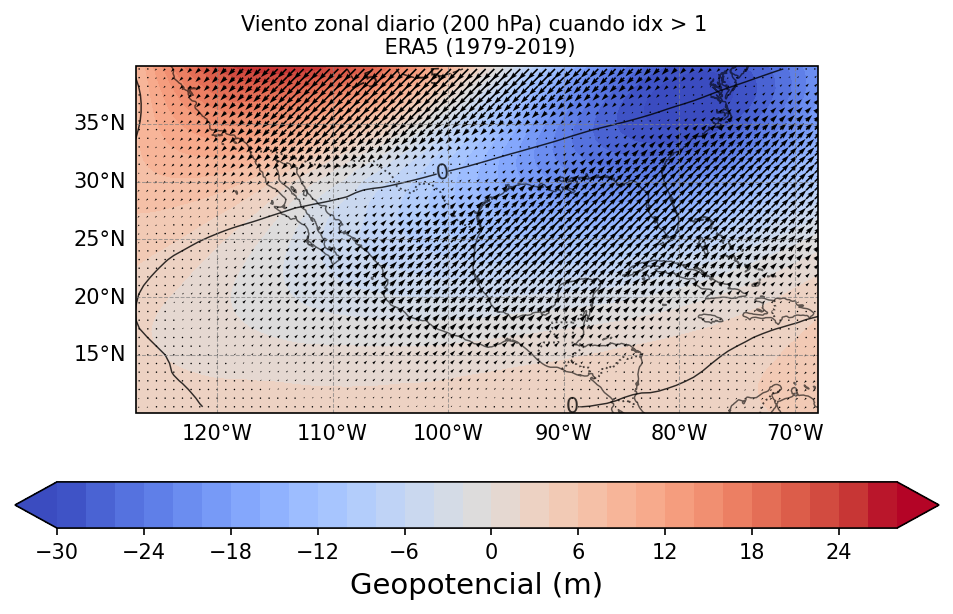

In [52]:
plt.figure(figsize=(14, 4), dpi=150)
plt.subplots_adjust(wspace=0.35)

ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=0.7,alpha=0.6)

cs = ax1.contourf(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals,levels=np.arange(-30,30,2),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
cc = ax1.contour(u_idxp_vals.longitude, u_idxp_vals.latitude, u_idxp_vals,levels=np.arange(-40,40,5),colors='k',transform=ccrs.PlateCarree(),linewidths=0.7,alpha=0.8)
ax1.quiver(u_idxp_vals.longitude, u_idxp_vals.latitude, u_idxp_vals, u_idxp_vals, transform=ccrs.PlateCarree())
ax1.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Geopotencial (m)', fontsize=14)
plt.title('Viento zonal diario (200 hPa) cuando idx > 1 \n ERA5 (1979-2019)', fontsize=10)

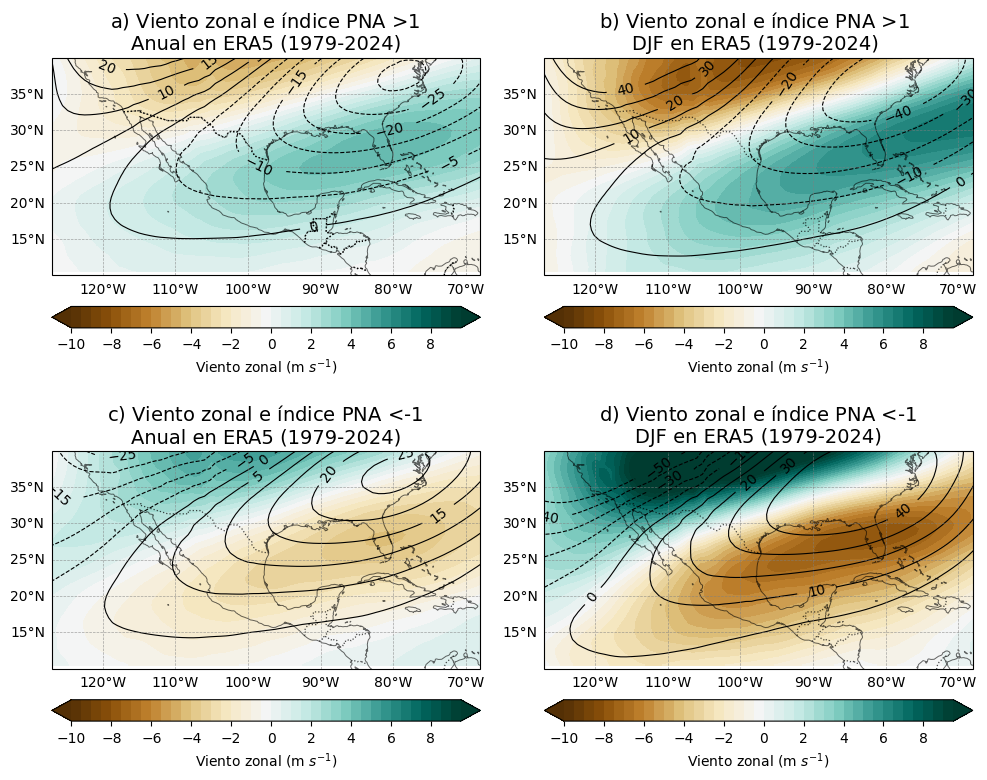

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)
plt.subplots_adjust(wspace=0.2, hspace=0.45)
axs = axs.flatten()

# Subplot 1: ANUAL INDICE >1
ax = axs[0]
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxp_vals.longitude,u_idxp_vals.latitude,u_idxp_vals,levels=np.arange(-10,10,0.5),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals, levels=np.arange(-30, 30, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('a$)$ Viento zonal e índice PNA >1 \nAnual en ERA5 (1979-2024)', fontsize=14)

# Subplot 2: ANUAL ÍNDICE <-1
ax = axs[2]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxn_vals.longitude,u_idxn_vals.latitude,u_idxn_vals,levels=np.arange(-10,10,0.5),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_vals.longitude,idxn_gph_vals.latitude,idxn_gph_vals, levels=np.arange(-30, 30, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('c$)$ Viento zonal e índice PNA <-1 \nAnual en ERA5 (1979-2024)', fontsize=14)

# Subplot 3: Viento zonal promedio durante eventos CAO - ERA-5
ax = axs[1]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxp_DJF.longitude,u_idxp_DJF.latitude,u_idxp_DJF,levels=np.arange(-10,10,0.5),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_djf.longitude,idxp_gph_djf.latitude,idxp_gph_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('b$)$ Viento zonal e índice PNA >1  \nDJF en ERA5 (1979-2024) ', fontsize=14)

# Subplot 4: Anomalía de viento zonal en DJF - ERA-5
ax = axs[3]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxn_DJF.longitude,u_idxn_DJF.latitude,u_idxn_DJF,levels=np.arange(-10,10,0.5),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_djf.longitude,idxn_gph_djf.latitude,idxn_gph_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('d$)$ Viento zonal e índice PNA <-1 \nDJF en ERA5 (1979-2024)', fontsize=14)

# plt.show()
plt.tight_layout()
plt.subplots_adjust(top=.95)
# plt.suptitle('Viento zonal a 200 hPa e índice PNA', fontsize=14, color="k", fontstyle='italic', fontweight='bold')

plt.savefig('figsok/vientoyPNA')